In [16]:
#===============
# (0) Imports
#===============
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


1. CARGAR DATASET MNIST

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
# Normalizar valores (0-255 - >0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Aplanar Imagenes (28x28 -> 784)
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

print("Shape train:", x_train.shape)
print("Shape test:", x_test.shape)

Shape train: (60000, 784)
Shape test: (10000, 784)


2. DEFINIR RED NEURONAL

In [20]:
model = models.Sequential([
    layers.Input(shape=(784,)),             #784 neuronas de entrada
    layers.Dense(128, activation='relu'),   #Capa oculta 1
    layers.Dropout(0,2),
    layers.Dense(64, activation='relu'),    #Capa oculta 2
    layers.Dropout(0,2),
    layers.Dense(10, activation='softmax')  #10 neuronas (clases 0-9)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

3. CALLBACKS

In [21]:
cbs = [
    callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    callbacks.ModelCheckpoint("mnist_best.keras", monitor="val_accuracy", save_best_only=True),
]

4. ENTRENAMIENTO

In [22]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=50,
    callbacks=cbs,
    verbose=1
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8249 - loss: 0.6357 - val_accuracy: 0.9602 - val_loss: 0.1381
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9535 - loss: 0.1599 - val_accuracy: 0.9673 - val_loss: 0.1085
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9687 - loss: 0.1068 - val_accuracy: 0.9707 - val_loss: 0.0962
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9771 - loss: 0.0779 - val_accuracy: 0.9723 - val_loss: 0.0928
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9828 - loss: 0.0595 - val_accuracy: 0.9720 - val_loss: 0.0930
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9865 - loss: 0.0466 - val_accuracy: 0.9720 - val_loss: 0.0953
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9899 - loss: 0.0367 - val_accuracy: 0.9732 - val_loss: 0.0976
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9924 - loss: 0.0291 - val_accuracy: 0.

5. EVALUACIÓN

In [23]:
y_pred = model.predict(x_test).argmax(axis=1)

print("\nMtriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Mtriz de confusión:
 [[ 965    0    2    1    0    1    5    2    4    0]
 [   0 1127    2    0    0    1    2    0    3    0]
 [   1    3 1011    4    4    1    2    2    4    0]
 [   0    0    2  978    0   14    0    2   10    4]
 [   0    0    1    0  974    0    2    0    1    4]
 [   1    0    0    3    1  875    3    0    6    3]
 [   3    2    0    1   13    7  930    0    2    0]
 [   1   10    8    4    4    1    0  988    3    9]
 [   1    1    4    5    4    5    2    4  945    3]
 [   3    2    0   11   20    5    0    6    9  953]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.95      0.99      0.97       982
           5       0.96      0.98      0.97       892

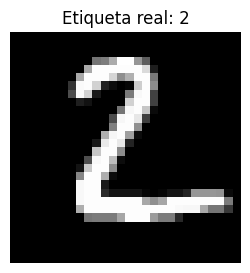

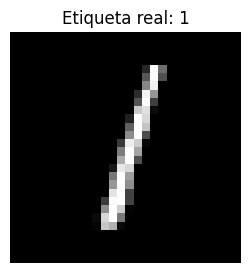

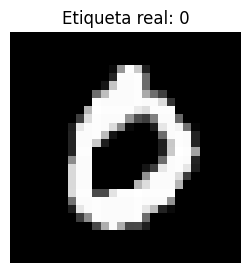

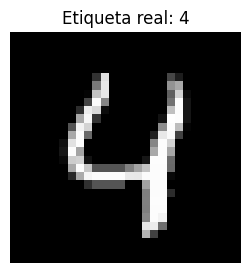

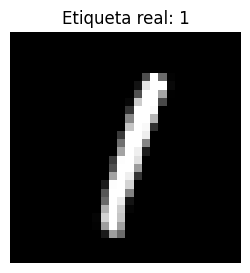

In [61]:
import matplotlib.pyplot as plt

# Seleccionar una imagen de prueba
start_idx = 1
num_img= 5

for i in range(num_img):
    plt.figure(figsize=(15,3))  # ancho, alto
    idx = start_idx + i
    sample_image = x_test[idx].reshape(28,28)
    sample_label = y_test[idx]

    # Mostrar Imagen
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Etiqueta real: {sample_label}")
    plt.axis("off")
    plt.show()

In [62]:
# Predicción
for i in range(num_img):
    idx = start_idx + i  # recalcula
    sample_label = y_test[idx]  # etiqueta real
    # Preparar el dato para el modelo (reshape 1x784)
    sample_input = x_test[idx].reshape(1, -1)

    pred_proba = model.predict(sample_input)
    pred_class = pred_proba.argmax(axis=1)[0]

    print(f"Etiqueta real: {sample_label}")
    print(f"Probabilidades por clase: {pred_proba}")
    print(f"Predicción del modelo: {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Etiqueta real: 2
Probabilidades por clase: [[8.2097974e-12 2.9549206e-05 9.9996865e-01 1.1987604e-09 1.3789253e-13
  1.2711432e-08 2.1672875e-08 6.6002752e-14 1.7513878e-06 1.6047634e-14]]
Predicción del modelo: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Etiqueta real: 1
Probabilidades por clase: [[1.5069082e-08 9.9989247e-01 3.3399649e-06 1.1206686e-07 2.4693385e-05
  7.3180786e-08 1.2916968e-06 3.5556270e-05 4.2276817e-05 1.8984368e-07]]
Predicción del modelo: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Etiqueta real: 0
Probabilidades por clase: [[9.9884331e-01 1.1766471e-05 9.3157450e-04 1.4752719e-07 4.3517865e-09
  3.5918939e-07 2.0869363e-04 4.1694980e-06 2.2646219e-08 8.7736636e-09]]
Predicción del modelo: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Etiqueta real: 4
Probabilidades por clase: [[7.0766254e-11 1.2872691e-09 3.3916620e-10 1.1807051e-10 9.9999642e-01
  1.5366768e-09 1.0912311e-09 3.5580283e-07 1.0194830e-10 3.2231023e-06]]
Predicción del mo